<a href="https://colab.research.google.com/github/athirarama/rama/blob/master/PCA_wine_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Perform Principal component analysis and perform clustering
* using first
* 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain
* optimum number of clusters and check whether we have obtained same number of clusters with the original data
* (class column we have ignored at the begining who shows it has 3 clusters)df

* Loaded the 'wine' dataset
* Removed the 'Type' column
* Scaled the remaining 13 features using StandardScaler
* Plotted a graph of Cumulative Explained variance for 13 features to identify the ideal number of PCA.
* According to this graph PCA = 5, ie. 5 components will preserve almost 80% of the information.

* WITH PCA=3

* Did Hierarchial clustering with clusters = 3
* Plotted elbow graph and found no. of clusters = 3 for KMeans
* Did KMeans clustering with no.of clusters = 3

* WITH PCA = 5

* Did KMeans Clustering with no.of clusters =3, and PCA =5 components

In [20]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans

In [21]:
wine_data = pd.read_csv('/content/wine.csv')
wine_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [22]:
print(wine_data.dtypes)
print(wine_data.isna().sum())

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object
Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


<Axes: ylabel='count'>

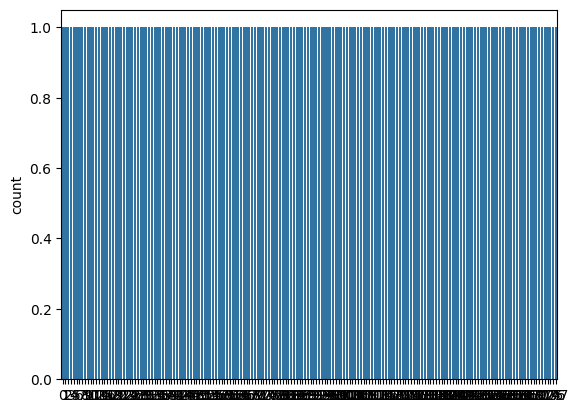

In [23]:
sns.countplot(wine_data['Type'])

In [24]:
wine_data['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [25]:
wine_ds = wine_data.iloc[:,1:]
print(wine_ds.shape)
wine_ds

(178, 13)


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## PCA Visualization

* As we have noticed before it is difficult to visualize high dimensional data, we can use PCA to find 2 principal    components and visualize the data in this new 2 dimensional space,with a single scatter plot. Before we do this though, we will need to scale our data so that each feature has a single unit variance.

In [26]:
scaler = StandardScaler()
scaled_input = scaler.fit_transform(wine_ds) # all input variables
print(scaled_input.shape)
print(scaled_input)

(178, 13)
[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


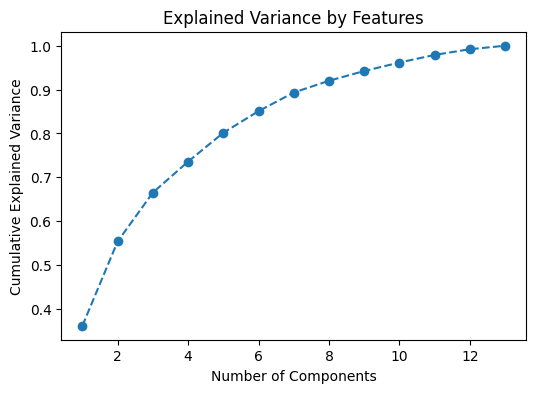

In [27]:
pca_feature = PCA()
pca_feature.fit(scaled_input)
#This shows variance of all 13 input features
print(pca_feature.explained_variance_ratio_)
plt.figure(figsize=(6,4))
plt.title("Explained Variance by Features")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.plot(range(1,14),pca_feature.explained_variance_ratio_.cumsum(), marker = 'o', linestyle= '--')

* The graph above shows the amount of variance (on y-axis) depending on the number of input features(on x-axis)
* Rule of the thumb is to preserve 80% of the variance.
* So, from the above graph, 5 components will have 80% of information preserved.

In [28]:
# Problem statement states 3 components
pca = PCA ( n_components = 3 )
input_pca = pca.fit_transform(scaled_input)
input_pca
pca_table = pd.DataFrame(input_pca, columns = ['pc1','pc2','pc3'])
pca_table

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [29]:
print(input_pca.shape)

(178, 3)


## Hierarchial Clustering

In [30]:
#agl_cluster = AgglomerativeClustering(n_clusters = 4)
agl_cluster = AgglomerativeClustering(n_clusters = 3)
agl_cluster.fit(input_pca)
agl_cluster.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [31]:
pca_table['h_clusters'] = agl_cluster.labels_
pca_table

,pc1,pc2,pc3,h_clusters
0,3.316751,-1.443463,-0.165739,2
1,2.209465,0.333393,-2.026457,2
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,2
4,1.008908,-0.869831,2.026688,2
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1
174,-2.601956,-1.757229,0.207581,1
175,-2.677839,-2.760899,-0.940942,1
176,-2.387017,-2.297347,-0.550696,1


In [32]:
pca_table['h_clusters'].value_counts()

0    66
2    65
1    47
Name: h_clusters, dtype: int64

In [33]:
pca_table[pca_table['h_clusters'] == 0].head(10)

,pc1,pc2,pc3,h_clusters
59,-0.928582,3.073486,-4.585064,0
60,-1.542480,1.381444,-0.874683,0
61,-1.836250,0.829984,-1.605702,0
62,0.030607,1.262786,-1.784408,0
63,2.050262,1.925033,-0.007369,0
64,-0.609681,1.908059,0.679358,0
65,0.900228,0.763911,0.573361,0
67,0.183384,2.427146,-1.069746,0
68,-0.812805,0.220514,-0.707005,0
70,-1.572216,0.884983,-0.628998,0


In [34]:
pca_table[pca_table['h_clusters'] == 1].head(10)

,pc1,pc2,pc3,h_clusters
83,-2.538977,0.087443,0.474251,1
131,-2.384501,-0.374583,-0.723823,1
132,-2.936940,-0.263862,-0.167640,1
133,-2.146811,-0.368255,-0.453301,1
135,-3.063842,-0.353413,-1.099124,1
136,-3.915754,-0.154583,0.221828,1
137,-3.936463,-0.659687,1.712215,1
138,-3.094276,-0.348843,-1.026831,1
139,-2.374472,-0.291980,1.241914,1
140,-2.778813,-0.286805,0.609670,1


## KMeans Clustering - PCA - 3

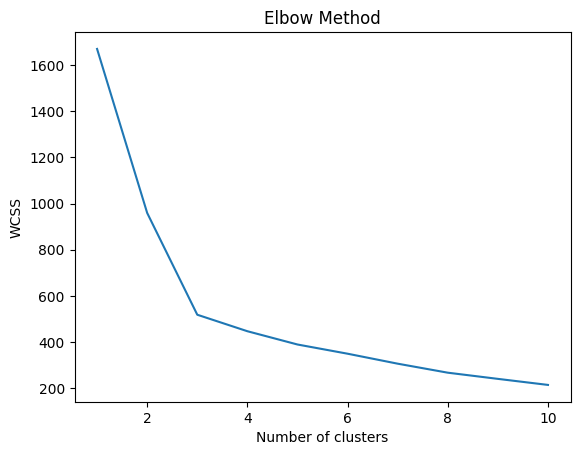

In [41]:
wcss = []
for i in range(1,11): # n_clusters values from 1 to 11
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_table) # passing scaled input
    wcss.append(kmeans.inertia_)
    #print(i,wcss)

plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [42]:
# from elbow method getting no. of clusters =3
k_clusters = KMeans(n_clusters = 3)
k_clusters.fit(pca_table)
k_clusters.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [43]:
pca_table['k_clusters'] = k_clusters.labels_
pca_table

,pc1,pc2,pc3,h_clusters,k_clusters
0,3.316751,-1.443463,-0.165739,2,0
1,2.209465,0.333393,-2.026457,2,0
2,2.516740,-1.031151,0.982819,2,0
3,3.757066,-2.756372,-0.176192,2,0
4,1.008908,-0.869831,2.026688,2,0
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1,2
174,-2.601956,-1.757229,0.207581,1,2
175,-2.677839,-2.760899,-0.940942,1,2
176,-2.387017,-2.297347,-0.550696,1,2


In [44]:
print("Wine dataset\n",wine_data['Type'].value_counts())
print("PCA with K clusters\n",pca_table['k_clusters'].value_counts())

Wine dataset
 2    71
1    59
3    48
Name: Type, dtype: int64
PCA with K clusters
 0    65
1    64
2    49
Name: k_clusters, dtype: int64


## KMeans Clustering - PCA - 5

In [47]:
# From graph 5 components
pca_5 = PCA ( n_components = 5 )
input_pca_5 = pca_5.fit_transform(scaled_input)
input_pca_5
pca_table_5 = pd.DataFrame(input_pca_5, columns = ['pc1','pc2','pc3','pc4','pc5'])
pca_table_5

,pc1,pc2,pc3,pc4,pc5
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655
2,2.516740,-1.031151,0.982819,0.724902,-0.251033
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842
4,1.008908,-0.869831,2.026688,-0.409766,0.298458
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164
174,-2.601956,-1.757229,0.207581,0.349496,0.255063
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955


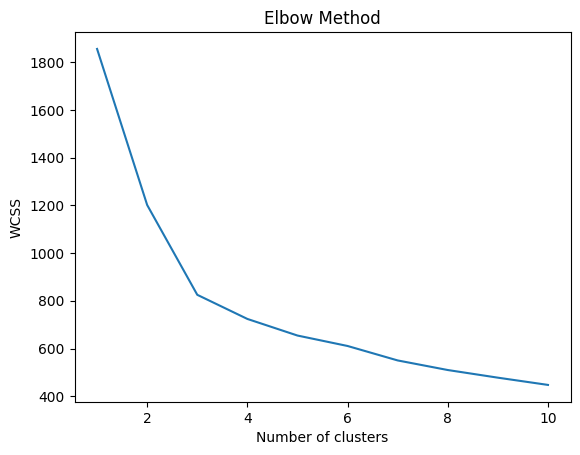

In [48]:
wcss = []
for i in range(1,11): # n_clusters values from 1 to 11
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_table_5) # passing scaled input with 5 PCA
    wcss.append(kmeans.inertia_)
    #print(i,wcss)

plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()
#from below graph cluster = 3

In [49]:
k_5_clusters = KMeans( n_clusters = 3 )
k_5_clusters.fit(input_pca_5)
k_5_clusters.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [50]:
pca_table_5['k_5_clusters'] = k_5_clusters.labels_
pca_table_5

,pc1,pc2,pc3,pc4,pc5,k_5_clusters
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,2
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,2
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,2
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,2
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,2
...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,1
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,1
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,1
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1


In [51]:
print("Wine dataset\n",wine_data['Type'].value_counts())
print(pca_table_5['k_5_clusters'].value_counts())

Wine dataset
 2    71
1    59
3    48
Name: Type, dtype: int64
0    65
2    62
1    51
Name: k_5_clusters, dtype: int64


**Universities**

In [54]:
# import dataset
univ=pd.read_csv('/content/Universities (1).csv')
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [55]:
univ2=univ.iloc[:,1:]
univ2

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [57]:
import sklearn.preprocessing
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
univ_norm=pd.DataFrame(sklearn.preprocessing.normalize(univ2),columns=univ2.columns)
univ_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.057602,0.003913,0.000967,0.000572,0.998323,0.004133
1,0.022252,0.001573,0.000393,0.000094,0.999750,0.001274
2,0.050283,0.002474,0.002355,0.000359,0.998725,0.002873
3,0.041538,0.002410,0.000761,0.000381,0.999130,0.002790
4,0.058443,0.003790,0.001507,0.000594,0.998274,0.004109
5,0.041628,0.002765,0.000715,0.000311,0.999125,0.002951
6,0.041597,0.002847,0.000949,0.000380,0.999125,0.003005
7,0.062235,0.003670,0.001190,0.000595,0.998043,0.004562
8,0.035398,0.002301,0.000354,0.000278,0.999368,0.002453
9,0.022230,0.001278,0.000750,0.000119,0.999751,0.001482


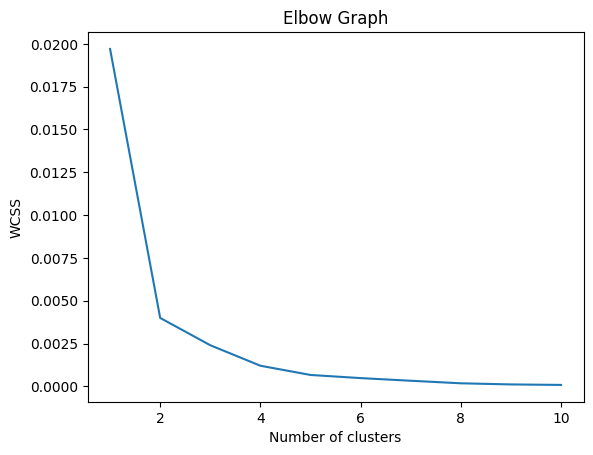

In [58]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change.
# within-cluster sum-of-squares criterion
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(univ_norm)
    wcss.append(kmeans.inertia_)
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [59]:
# Cluster algorithm using K=4
clusters4=KMeans(4,random_state=42).fit(univ_norm)
clusters4

KMeans(n_clusters=4, random_state=42)

In [60]:
clusters4.labels_

array([2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 3, 1, 2, 1, 0, 1, 3, 0, 3, 2,
       3, 3, 0], dtype=int32)

In [61]:
# Assign clusters to the data set
univ4=univ.copy()
univ4['clusters4id']=clusters4.labels_
univ4

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusters4id
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [62]:

# Compute the centroids for K=4 clusters with 6 variables
clusters4.cluster_centers_

array([[3.46646918e-02, 2.24687473e-03, 7.06752500e-04, 2.76919972e-04,
        9.99368329e-01, 2.35828706e-03],
       [1.12757732e-01, 4.12201708e-03, 7.59230756e-03, 2.23017002e-03,
        9.93524025e-01, 7.67108453e-03],
       [5.22104146e-02, 3.25463035e-03, 1.31079644e-03, 4.53485821e-04,
        9.98601114e-01, 3.60725405e-03],
       [8.45769889e-02, 4.97680644e-03, 3.77213808e-03, 1.06221659e-03,
        9.96360145e-01, 5.92662638e-03]])

In [63]:
# Group data by Clusters (K=4)
univ4.groupby('clusters4id').agg(['mean']).reset_index()

,clusters4id,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1349.000000,87.500000,27.900000,10.400000,41026.200000,91.000000
1,1,1053.666667,38.333333,70.333333,20.666667,9318.333333,72.000000
2,2,1289.285714,80.571429,32.428571,11.000000,25077.857143,88.857143
3,3,1197.000000,71.600000,52.600000,15.000000,14187.600000,84.000000


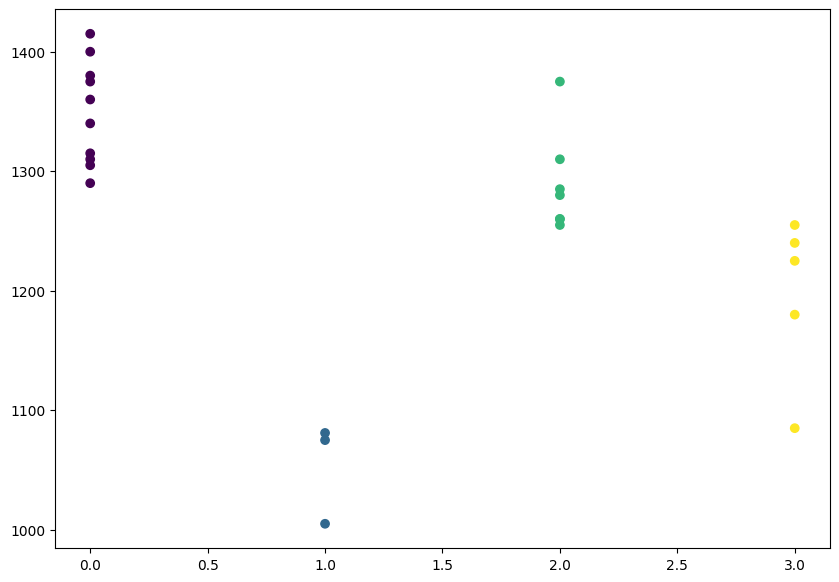

In [64]:
# Plot Clusters
plt.figure(figsize=(10, 7))
plt.scatter(univ4['clusters4id'],univ4['SAT'], c=clusters4.labels_)

In [65]:
# Cluster algorithm using K=3
clusters3=KMeans(3,random_state=42).fit(univ_norm)
clusters3

KMeans(n_clusters=3, random_state=42)

In [66]:
clusters3.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 2, 0, 2, 0,
       2, 2, 0], dtype=int32)

In [67]:
# Assign clusters to the data set
univ3=univ.copy()
univ3['clusters3id']=clusters3.labels_
univ3

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusters3id
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [68]:
# Compute the centroids for K=3 clusters with 6 variables
clusters3.cluster_centers_

array([[4.06177922e-02, 2.59884486e-03, 9.40809119e-04, 3.34282712e-04,
        9.99115477e-01, 2.76696196e-03],
       [1.12757732e-01, 4.12201708e-03, 7.59230756e-03, 2.23017002e-03,
        9.93524025e-01, 7.67108453e-03],
       [8.08533483e-02, 4.75894571e-03, 3.34180743e-03, 9.84360002e-04,
        9.96640697e-01, 5.69923160e-03]])

In [69]:
# Group data by Clusters (K=3)
univ3.groupby('clusters3id').agg(['mean']).reset_index()

,clusters3id,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1328.750000,85.312500,30.125000,10.562500,35355.062500,90.000000
1,1,1053.666667,38.333333,70.333333,20.666667,9318.333333,72.000000
2,2,1206.666667,72.000000,47.833333,14.500000,15177.333333,85.333333


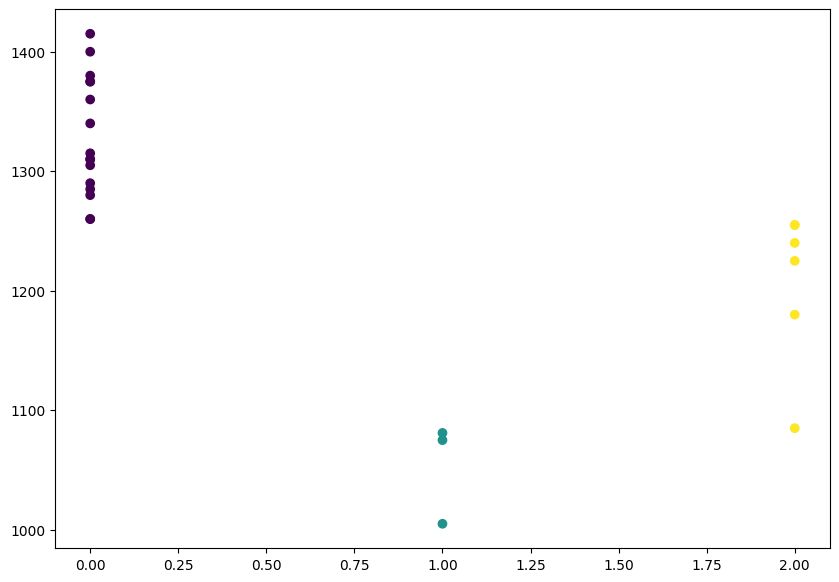

In [70]:
# Plot Clusters
plt.figure(figsize=(10, 7))
plt.scatter(univ3['clusters3id'],univ3['SAT'], c=clusters3.labels_)